<a href="https://colab.research.google.com/github/jxblrkrstffrbrms/ITBA3206-SPARTACUS/blob/main/Reaching_New_Heights_Boosting_Vaccinations_for_a_Safer_Community.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reaching New Heights : Boosting Vaccinations for a Safer Community**

---



The goal of this analysis is to examine the current COVID-19 data in the Philippines as well as the vaccination status in our country. A dataset from Our World in Data will be used to obtain all of the information required to analyze the current trend of daily COVID-19 cases as well as the vaccination rollout in our country. The data will be used to encourage some Filipinos who are still afraid of getting vaccinated to get vaccinated, as well as to provide an analysis of how getting vaccinated will help to reduce overall cases in the country.

This notebook contains three parts.

**Part 1 - Importing Necessary Libraries and Dataset**

**Part 2 - Data Cleaning**

**Part 3 - Visualizations**

# PART 1 : IMPORTING NECESSARY LIBRARIES AND DATASET

> Importing all libraries needed in the analysis.

In [ ]:
import numpy as np
import pandas as pd



> Uploading the **.csv** file.



In [ ]:
url = 'https://raw.githubusercontent.com/jxblrkrstffrbrms/ITBA3206-SPARTACUS/main/dataset_ph.csv'



> Reading and printing the .csv file.



In [ ]:
df= pd.read_csv(url)
display(df)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Philippines,30/01/2020,1,1.0,NaN,NaN,NaN,NaN,0.009,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,NaN,NaN,NaN
1,Asia,Philippines,31/01/2020,1,0.0,NaN,NaN,NaN,NaN,0.009,...,7.8,40.8,78.463,1.0,71.23,0.718,-1699.0,-3.08,-3.08,-15.29984
2,Asia,Philippines,01/02/2020,1,0.0,NaN,NaN,NaN,NaN,0.009,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,NaN,NaN,NaN
3,Asia,Philippines,02/02/2020,2,1.0,NaN,1.0,1.0,NaN,0.018,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,NaN,NaN,NaN
4,Asia,Philippines,03/02/2020,2,0.0,NaN,1.0,0.0,NaN,0.018,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,Asia,World,28/04/2022,10638632,7116.0,15066.857,43037.0,3.0,6.571,108370.774,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN
1664,Asia,World,29/04/2022,10644700,6068.0,14339.429,43038.0,1.0,5.714,108432.586,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN
1665,Asia,World,30/04/2022,10649809,5109.0,13588.571,43041.0,3.0,5.286,108484.629,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN
1666,Asia,World,01/05/2022,10653526,3717.0,12860.571,43042.0,1.0,4.143,108522.492,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN


> The dataset our team got contains all the data regarding COVID-19 around the world.
> Since what we'll need for the analysis is only for our country which is the Philippines, we need to delete unnecessary rows and columns from our dataset. Also, cleaning the dataset is essential for us to have accurate results.

# PART 2 : DATA CLEANING

> First, lets delete unnecessary columns.

In [ ]:
df1= pd.DataFrame(df)
df1.drop(['new_cases_smoothed', 
          'new_deaths_smoothed', 
          'excess_mortality', 
          'excess_mortality_cumulative_per_million', 
          'new_cases_smoothed_per_million', 
          'excess_mortality_cumulative_absolute', 
          'excess_mortality_cumulative', 
          'gdp_per_capita', 
          'extreme_poverty', 
          'cardiovasc_death_rate',
          'human_development_index',
          'life_expectancy',
          'hospital_beds_per_thousand',
          'diabetes_prevalence',
          'population_density',
          'stringency_index',
          'new_people_vaccinated_smoothed_per_hundred',
          'new_people_vaccinated_smoothed',
          'new_vaccinations_smoothed_per_million',
          'new_vaccinations_smoothed',
          'new_tests_smoothed_per_thousand',
          'new_tests_smoothed',
          'weekly_hosp_admissions_per_million',
          'weekly_icu_admissions_per_million',
          'hosp_patients_per_million',
          'icu_patients_per_million',
          'new_deaths_smoothed_per_million',
          'icu_patients',
          'hosp_patients',
          'weekly_icu_admissions',
          'weekly_hosp_admissions'], axis = 1, inplace=True)
display(df1)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,handwashing_facilities
0,Asia,Philippines,30/01/2020,1,1.0,NaN,NaN,0.009,0.009,NaN,...,NaN,NaN,NaN,111046910,25.2,4.803,2.661,7.8,40.8,78.463
1,Asia,Philippines,31/01/2020,1,0.0,NaN,NaN,0.009,0.000,NaN,...,NaN,NaN,NaN,111046910,25.2,4.803,2.661,7.8,40.8,78.463
2,Asia,Philippines,01/02/2020,1,0.0,NaN,NaN,0.009,0.000,NaN,...,NaN,NaN,NaN,111046910,25.2,4.803,2.661,7.8,40.8,78.463
3,Asia,Philippines,02/02/2020,2,1.0,1.0,1.0,0.018,0.009,0.009,...,NaN,NaN,NaN,111046910,25.2,4.803,2.661,7.8,40.8,78.463
4,Asia,Philippines,03/02/2020,2,0.0,1.0,0.0,0.018,0.000,0.009,...,NaN,NaN,NaN,111046910,25.2,4.803,2.661,7.8,40.8,78.463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,Asia,World,28/04/2022,10638632,7116.0,43037.0,3.0,108370.774,72.487,438.398,...,NaN,NaN,NaN,98168829,32.6,7.150,4.718,1.0,45.9,85.847
1664,Asia,World,29/04/2022,10644700,6068.0,43038.0,1.0,108432.586,61.812,438.408,...,NaN,NaN,NaN,98168829,32.6,7.150,4.718,1.0,45.9,85.847
1665,Asia,World,30/04/2022,10649809,5109.0,43041.0,3.0,108484.629,52.043,438.439,...,NaN,NaN,NaN,98168829,32.6,7.150,4.718,1.0,45.9,85.847
1666,Asia,World,01/05/2022,10653526,3717.0,43042.0,1.0,108522.492,37.863,438.449,...,NaN,NaN,NaN,98168829,32.6,7.150,4.718,1.0,45.9,85.847


> As you can see, there are NaN values inside the dataset. There are two options. Either delete them, or replace them with a new value. For this, we will replace specified columns with NaN values.

In [ ]:
df1.fillna(0, inplace = True)
display(df1)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,handwashing_facilities
0,Asia,Philippines,30/01/2020,1,1.0,0.0,0.0,0.009,0.009,0.000,...,0.0,0.0,0.0,111046910,25.2,4.803,2.661,7.8,40.8,78.463
1,Asia,Philippines,31/01/2020,1,0.0,0.0,0.0,0.009,0.000,0.000,...,0.0,0.0,0.0,111046910,25.2,4.803,2.661,7.8,40.8,78.463
2,Asia,Philippines,01/02/2020,1,0.0,0.0,0.0,0.009,0.000,0.000,...,0.0,0.0,0.0,111046910,25.2,4.803,2.661,7.8,40.8,78.463
3,Asia,Philippines,02/02/2020,2,1.0,1.0,1.0,0.018,0.009,0.009,...,0.0,0.0,0.0,111046910,25.2,4.803,2.661,7.8,40.8,78.463
4,Asia,Philippines,03/02/2020,2,0.0,1.0,0.0,0.018,0.000,0.009,...,0.0,0.0,0.0,111046910,25.2,4.803,2.661,7.8,40.8,78.463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,Asia,World,28/04/2022,10638632,7116.0,43037.0,3.0,108370.774,72.487,438.398,...,0.0,0.0,0.0,98168829,32.6,7.150,4.718,1.0,45.9,85.847
1664,Asia,World,29/04/2022,10644700,6068.0,43038.0,1.0,108432.586,61.812,438.408,...,0.0,0.0,0.0,98168829,32.6,7.150,4.718,1.0,45.9,85.847
1665,Asia,World,30/04/2022,10649809,5109.0,43041.0,3.0,108484.629,52.043,438.439,...,0.0,0.0,0.0,98168829,32.6,7.150,4.718,1.0,45.9,85.847
1666,Asia,World,01/05/2022,10653526,3717.0,43042.0,1.0,108522.492,37.863,438.449,...,0.0,0.0,0.0,98168829,32.6,7.150,4.718,1.0,45.9,85.847


> Now that we're done cleaning the dataset, we can now move on to visualizing the data.

# PART 3 : VISUALIZATIONS

> First, let's import the Matplotlib Pyplot library.

In [ ]:
import matplotlib.pyplot as plt

> Now, let's make the visualizations needed in the analysis.

> First, let's view the daily cases of COVID-19 in the Philippines.

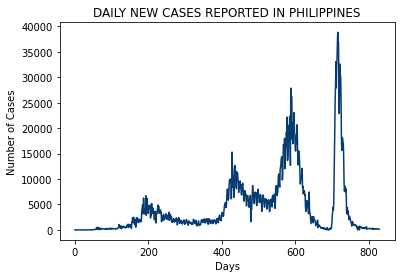

In [ ]:
ph_ver = df1.loc[df1['location'] == 'Philippines']

ph_newcases = np.array(ph_ver['new_cases'])

plt.plot(ph_newcases, c='#063c72')
plt.title("DAILY NEW CASES REPORTED IN PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Number of Cases")

plt.show()

> Now, let's view the daily cases in the world.

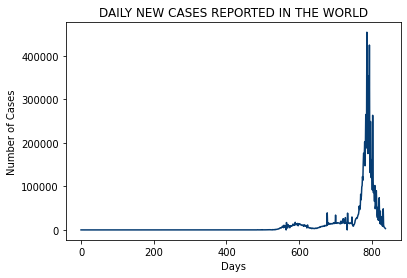

In [ ]:
world_ver = df1.loc[df1['location'] == 'World']

world_newcases = np.array(world_ver['new_cases'])

plt.plot(world_newcases, c='#063c72')
plt.title("DAILY NEW CASES REPORTED IN THE WORLD")
plt.xlabel("Days")
plt.ylabel("Number of Cases")

plt.show()

> Now, let's compare the two.

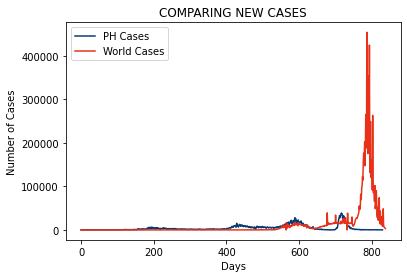

In [ ]:
a = np.array(ph_ver['new_cases'])
b = np.array(world_ver['new_cases'])

plt.plot(a, c='#063c72', label='PH Cases')
plt.plot(b, c='#e9311a', label='World Cases')
plt.title("COMPARING NEW CASES")
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.legend()

plt.show()

> Now that we're done looking at the daily cases in the Philippines and the world, we can now analyze the number of deaths.

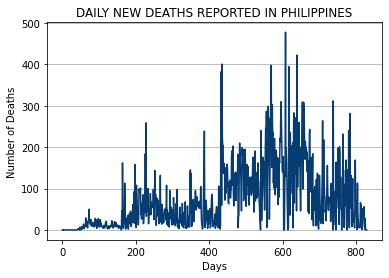

In [ ]:
ph_newdeaths = np.array(ph_ver['new_deaths'])

plt.plot(ph_newdeaths, c='#063c72')
plt.title("DAILY NEW DEATHS REPORTED IN PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Number of Deaths")
plt.grid(axis='y')

plt.show()

> Next, let's analyze the positive rate of the Philippines.

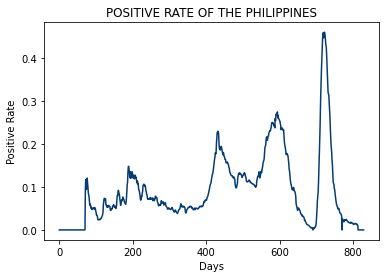

In [ ]:
a = np.array(ph_ver['positive_rate'])

plt.plot(a, c='#063c72')
plt.title("POSITIVE RATE OF THE PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Positive Rate")

plt.show()

> We can now move on to analyzing the vaccinations in the Philippines.

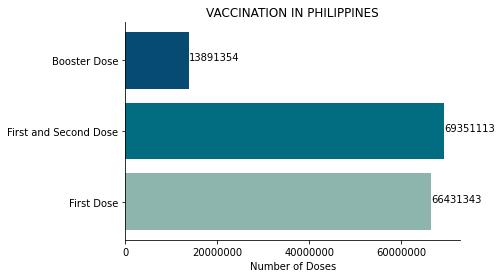

In [ ]:
a = np.array(["First Dose", "First and Second Dose", "Booster Dose"])
b = np.array([66431343, 69351113, 13891354])

fig, ax = plt.subplots()
side1 = ax.spines["top"]
side1.set_visible(False)
side2 = ax.spines["right"]
side2.set_visible(False)

plt.ticklabel_format(style='plain')
plt.locator_params(nbins=4)
c = ['#8db4ad', '#026c80', '#064c72']
plt.barh(a,b, color = c)

for index, value in enumerate(b):
  plt.text(value, index, str(value))

plt.title("VACCINATION IN PHILIPPINES")
plt.xlabel("Number of Doses")
plt.show()

> Now, let's check the percentage of people vaccinated.

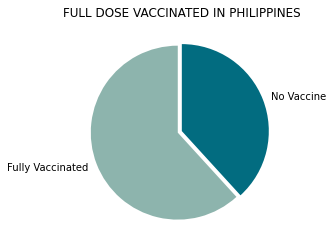

In [ ]:
a = np.array([61.78, 38.22])
label = ["Fully Vaccinated", "No Vaccine"]
dataexplode = [0.05,0]
c = ['#8db4ad', '#026c80']

plt.pie(a, labels = label, explode = dataexplode, colors = c, startangle=90)
plt.title("FULL DOSE VACCINATED IN PHILIPPINES")

plt.show()

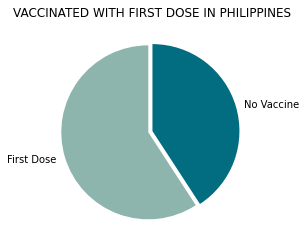

In [ ]:
a = np.array([59.19, 40.81])
label = ["First Dose", "No Vaccine"]
dataexplode = [0.05,0]
c = ['#8db4ad', '#026c80']

plt.pie(a, labels = label, explode = dataexplode, colors = c, startangle=90)
plt.title("VACCINATED WITH FIRST DOSE IN PHILIPPINES")

plt.show()

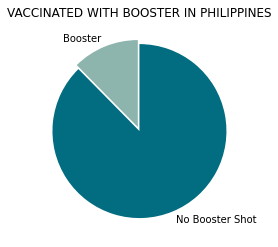

In [ ]:
a = np.array([12.38, 87.62])
label = ["Booster", "No Booster Shot"]
dataexplode = [0.05,0]
c = ['#8db4ad', '#026c80']

plt.pie(a, labels = label, explode = dataexplode, colors = c, startangle=90)
plt.title("VACCINATED WITH BOOSTER IN PHILIPPINES")

plt.show()

> Here are more detailed visualization of the vaccinations here in the Philippines.

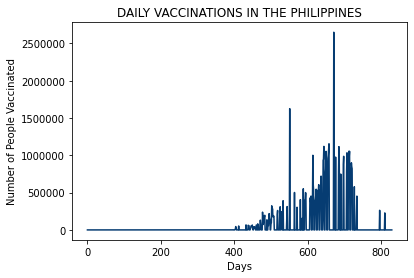

In [ ]:
ph_newvaxx = np.array(ph_ver['new_vaccinations'])

plt.ticklabel_format(style='plain')
plt.plot(ph_newvaxx, c='#063c72')
plt.title("DAILY VACCINATIONS IN THE PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Number of People Vaccinated")

plt.show()

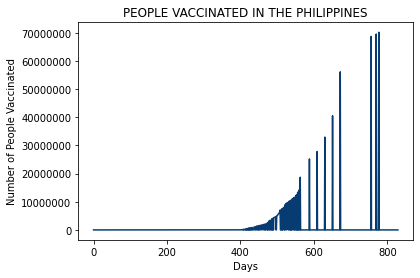

In [ ]:
ph_pplvaxx = np.array(ph_ver['people_vaccinated'])

plt.ticklabel_format(style='plain')
plt.plot(ph_pplvaxx, c='#063c72')
plt.title("PEOPLE VACCINATED IN THE PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Number of People Vaccinated")

plt.show()

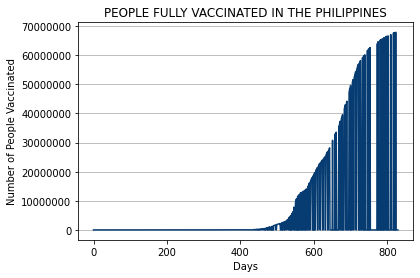

In [ ]:
ph_fullyvaxx = np.array(ph_ver['people_fully_vaccinated'])

plt.ticklabel_format(style='plain')
plt.plot(ph_fullyvaxx, c='#063c72')
plt.title("PEOPLE FULLY VACCINATED IN THE PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Number of People Vaccinated")
plt.grid(axis='y')

plt.show()

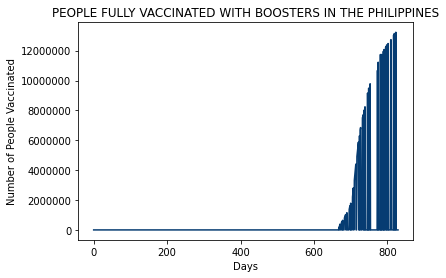

In [ ]:
ph_booster = np.array(ph_ver['total_boosters'])

plt.ticklabel_format(style='plain')
plt.plot(ph_booster, c='#063c72')
plt.title("PEOPLE FULLY VACCINATED WITH BOOSTERS IN THE PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Number of People Vaccinated")

plt.show()

In [ ]:
a = np.array(ph_ver['total_vaccinations'])

plt.ticklabel_format(style='plain')
plt.plot(a, c='#063c72')
plt.title("TOTAL VACCINATIONS IN THE PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Number of People Vaccinated")

plt.show()